In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('fivethirtyeight')

# Introduction

Today I will be exploring instant ramen of various countries and how ramen enthuistasts rate these ramen by country. The data I will be using in this notebook comes from Kaggle: [Ramen Ratings](https://www.kaggle.com/residentmario/ramen-ratings).


Let's begin by reading the data in and taking a look at the first few rows.

In [2]:
df = pd.read_csv('razzak_abir_stat201FinalProject.csv')
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


# Data Cleanup

Let's clean up the data a bit. First I'll start with converting any non-numeric values in the 'Stars' row to NaN (stands for "Not a Number"), to make calculations possible.

In [3]:
df.Stars = pd.to_numeric(df.Stars, errors='coerce')

# Variables

Now that the data is cleaned up, I can now present the descriptive statistics for the Stars column in the dataset.

## Review #

'Review #' is the counter variable most likely used to log all the reviews in chronological order. For the sake of this notebook, this variable is useless as we have row numbers built into Python.

## Brand

Brand represents the company that makes the ramen that is being reviewed. In the dataset, there are 355 unique brands, with the highest rated brand being Nissin, with 381 ratings.

## Variety

Variety refers to the flavor of the specific ramen. The variety of a specific ramen is directly linked to the brand, so the two variables do not vary independently. There are 2413 unique varieties in the dataset, with "Beef" and "Chicken" being the highest rated ramen varieties.

## Stars

In the ramen reviews, the reviewers must rate the ramen on a scale from 0 (worst) to 5 (best). Here we can see that the overall average rating is a mean of 3.655 (rounded to 3 decimal points) and a median of 3.75. Calculated mode for the ratings is 4.0.



In [4]:
# Brands
print('Number of unique Brands:\t{}'.format(df['Brand'].nunique()))
print('Brand breakdown:\n{}'.format(df['Brand'].value_counts()))

Number of unique Brands:	355
Brand breakdown:
Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
                ... 
Ishimaru           1
Hua Feng           1
Sutah              1
Plats Du Chef      1
Sunny Maid         1
Name: Brand, Length: 355, dtype: int64


In [5]:
# Variety
print('Number of unique Varieties:\t{}'.format(df['Variety'].nunique()))
print('Variety breakdown:\n{}'.format(df['Variety'].value_counts()))

Number of unique Varieties:	2413
Variety breakdown:
Chicken                                       7
Beef                                          7
Artificial Chicken                            6
Vegetable                                     6
Yakisoba                                      6
                                             ..
Spicy Beef Flavor Instant Noodle              1
Spice Seafood                                 1
King Bowl Super Spicy Pan Stirfried Noodle    1
Lemon Chicken Flavour Instant Noodles         1
Jin Ramen (Hot Taste)                         1
Name: Variety, Length: 2413, dtype: int64


In [6]:
# Stars
print('\t\tStars')
print('Min:\t\t{}'.format(df['Stars'].min()))
print('Q1:\t\t{}'.format(df['Stars'].quantile(0.25)))
print('Median:\t\t{}'.format(df['Stars'].median()))
print('Mean:\t\t{}'.format(df['Stars'].mean().round(3)))
print('Q3:\t\t{}'.format(df['Stars'].quantile(0.75)))
print('Max:\t\t{}'.format(df['Stars'].max()))
print('Mode:\t\t{}'.format(df['Stars'].mode().values[0]))

		Stars
Min:		0.0
Q1:		3.25
Median:		3.75
Mean:		3.655
Q3:		4.25
Max:		5.0
Mode:		4.0


# Visualization #

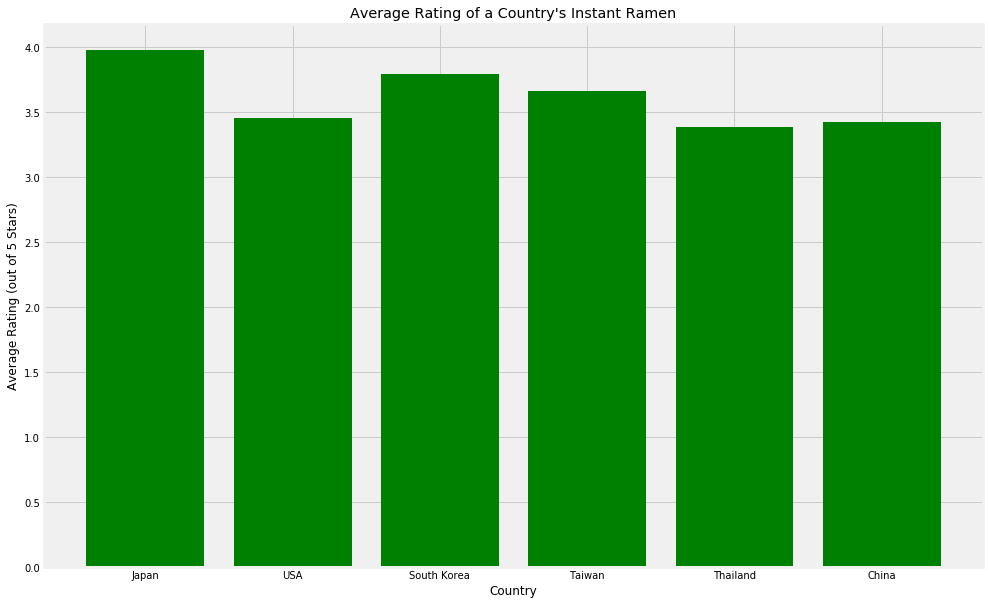

In [9]:
# Calculate the means for the 6 most rated country's instant ramens
countries = ['Japan', 'USA', 'South Korea', 'Taiwan', 'Thailand', 'China']
means = []

japan_mean = df.loc[df['Country'] == 'Japan']['Stars'].mean().round(3)
means.append(japan_mean)

usa_mean = df.loc[df['Country'] == 'USA']['Stars'].mean().round(3)
means.append(usa_mean)

korea_mean = df.loc[df['Country'] == 'South Korea']['Stars'].mean().round(3)
means.append(korea_mean)

taiwan_mean = df.loc[df['Country'] == 'Taiwan']['Stars'].mean().round(3)
means.append(taiwan_mean)

thailand_mean = df.loc[df['Country'] == 'Thailand']['Stars'].mean().round(3)
means.append(thailand_mean)

china_mean = df.loc[df['Country'] == 'China']['Stars'].mean().round(3)
means.append(china_mean)

# Plot a graph

x_pos = [i for i, _ in enumerate(countries)]
f, ax = plt.subplots(figsize=(15,10))
plt.bar(x_pos, means, color='green')
plt.xlabel("Country")
plt.ylabel("Average Rating (out of 5 Stars)")
plt.title("Average Rating of a Country's Instant Ramen")

plt.xticks(x_pos, countries)
plt.show()

# Analysis #